In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import trapezoid

In [47]:
def plot_2_arrays(xValues, yValues, xLabel, yLabel, title):
    plt.figure(figsize=(10,6))
    plt.plot(xValues, yValues)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [81]:
#TRUE STRESS-STRAIN
def trueStressStrain(EpsE, Force):
    EpsT= np.log(1+EpsE)
    A0 = 0.5**2*np.pi #mm^2

    SigmaEng = Force/A0

    SigmaT = SigmaEng*(1+EpsE)
    
    return SigmaT, EpsT

In [59]:

def DispAndTime_FromExcel_UC(fileName, sheetName, dt):
    pix_mm_ratio = 1771/10 

    # Importing data 
    data = pd.read_excel(fileName, sheetName)
    disp_pix = np.array(data['Location v [pix]'])

    # Converting displacement from pix to mm 
    disp = (disp_pix-disp_pix[0])/pix_mm_ratio

    total_time = dt*(len(disp)-1)
    time = np.linspace(0,total_time,len(disp))

    return disp, time

In [60]:
# Function that reads an exelfile and returns displacement and force

def ForceAndDisp_FromExcel(filename, sheetname):
    Data = pd.read_excel(filename, sheet_name=sheetname)

    disp = np.array(Data['Displacement (mm)'])
    force = np.array(Data['Force (kN)'])

    return force, disp

Importing machine force and displacement

In [61]:
force_UC_1, disp_UC_1 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_1')
force_UC_2, disp_UC_2 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_2')
force_UC_3, disp_UC_3 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_3')
force_UC_4, disp_UC_4 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_4')
force_UC_5, disp_UC_5 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_5')
force_UC_6, disp_UC_6 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_6')
#force_UC_7, disp_UC_7 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_7')
#force_UC_8, disp_UC_8 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_8')
#force_UC_9, disp_UC_9 = ForceAndDisp_FromExcel('Preliminary_tests_data.xlsx', 'UC_9')

Importing DIC displacement and time 

In [62]:
#TENTATIV: Spør mona om dt 
# Find dt from DIC
# UC_1:
data = pd.read_excel('Preliminary_tests_data.xlsx','UC_1')
time = np.array(data['Time [s]'])
dt_DIC_UC = np.mean(time[:20])


disp_UC_DIC_1, time_UC_DIC_1 = DispAndTime_FromExcel_UC('Preliminary_tests_data.xlsx', 'UC_1', dt_DIC_UC)
disp_UC_DIC_2, time_UC_DIC_2 = DispAndTime_FromExcel_UC('Preliminary_tests_data.xlsx', 'UC_2', dt_DIC_UC)


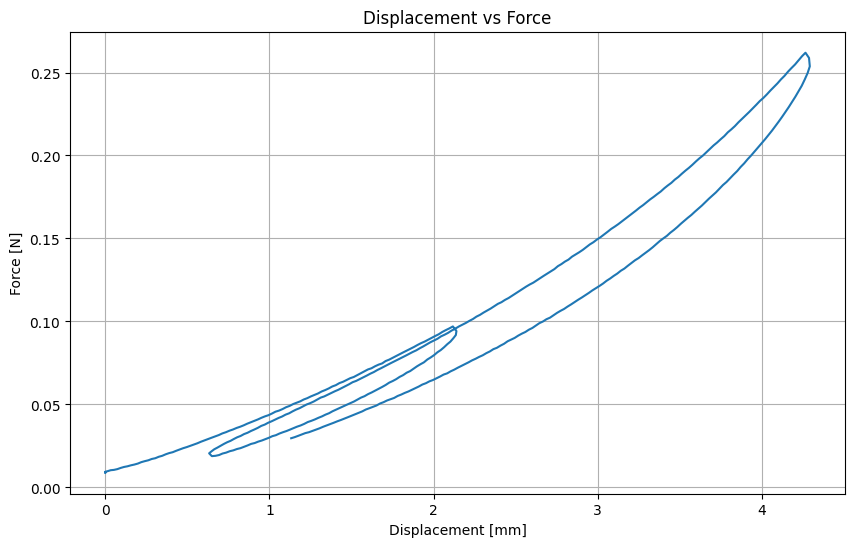

In [112]:
#plot_2_arrays(disp_UC_DIC_1, time_UC_DIC_1, 'Displacement [mm]', 'Time [s]', 'Displacement vs Time')
#plot_2_arrays(disp_UC_DIC_1, -force_UC_1[:len(disp_UC_DIC_1)],'Displacement [mm]', 'Force [N]', 'Displacement vs Force')
plot_2_arrays(disp_UC_DIC_2[:500], -force_UC_2[:500],'Displacement [mm]', 'Force [N]', 'Displacement vs Force')


Convert to stress - strain - stretch 

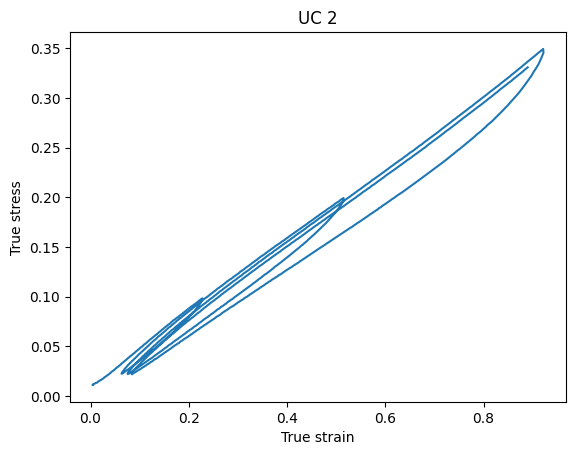

In [119]:
A0 = np.pi*0.5**2
L0 = 10 # TENTATIV: Spør mona om dette

eps_eng_UC_2 = disp_UC_2/L0 
eps_true_UC_2 = np.log(1+eps_eng_UC_2)

sigma_eng_UC_2 = force_UC_2/A0
sigma_true_UC_2 = sigma_eng_UC_2*(1+eps_eng_UC_2)

stretch_UC_2 = (L0-disp_UC_DIC_2)/L0

plt.plot(-eps_true_UC_2[:1300], -sigma_true_UC_2[:1300])
plt.xlabel('True strain')
plt.ylabel('True stress')
plt.title('UC 2')
plt.show()


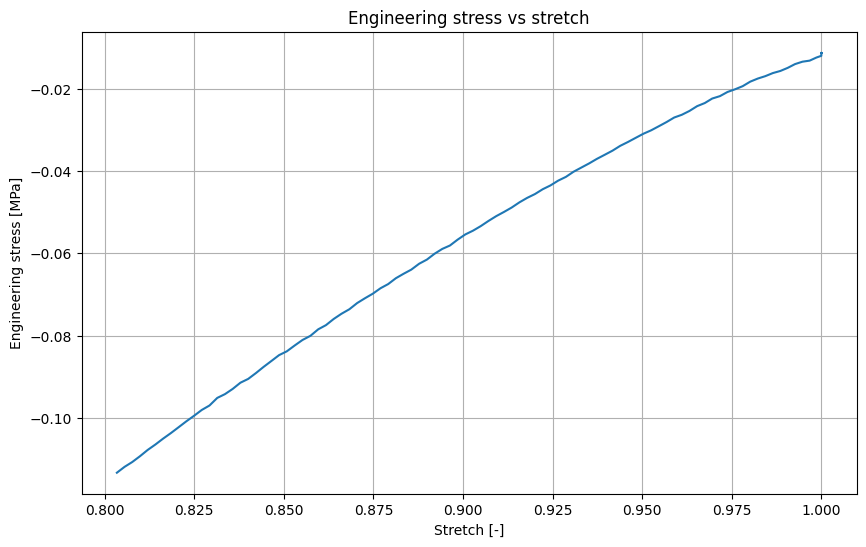

In [106]:
plot_2_arrays(stretch_UC_2[:100], sigma_eng_UC_2[:100], 'Stretch [-]', 'Engineering stress [MPa]', 'Engineering stress vs stretch')


 --

# Bergstrom-Boyce 

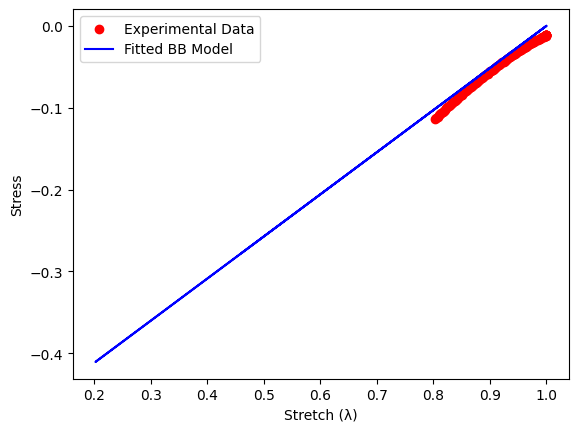

Fitted Parameters:
Shear Modulus (μ) = 0.515
Locking Stretch (λL) = 6.000
Viscoplastic Parameter (η) = 0.200


In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the BB model equation (simplified)
def bb_model(lmb, mu, lambda_L, eta):
    return np.where(lmb < lambda_L,
                    mu * (lmb - 1),
                    mu * lambda_L * (1 - np.exp(-eta * (lmb - lambda_L))))

# Fit the model to data
popt, _ = curve_fit(bb_model, stretch_UC_2[:200], sigma_eng_UC_2[:200], p0=[1.0, 6.0, 0.2])
mu_fit, lambda_L_fit, eta_fit = popt

# Plot results
plt.scatter(stretch_UC_2[:100], sigma_eng_UC_2[:100], label="Experimental Data", color="red")
plt.plot(stretch_UC_2, bb_model(stretch_UC_2, *popt), label="Fitted BB Model", color="blue")
plt.xlabel("Stretch (λ)")
plt.ylabel("Stress")
plt.legend()
plt.show()

print(f"Fitted Parameters:\nShear Modulus (μ) = {mu_fit:.3f}")
print(f"Locking Stretch (λL) = {lambda_L_fit:.3f}")
print(f"Viscoplastic Parameter (η) = {eta_fit:.3f}")